# --- Modelado

## Cargamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from datetime import datetime,timedelta
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

## Vamos a leer nuestra base de datos

In [2]:
import io
import requests

In [3]:
url="https://raw.githubusercontent.com/TFM123456/Big_Data_and_Data_Science_UCM/main/datos_galicia_limpio.csv"
s=requests.get(url).content
datos_galicia=pd.read_csv(io.StringIO(s.decode('ISO-8859-1')))

In [4]:
datos_galicia.head()

,Unnamed: 0,id,superficie,fecha,lat,lng,idprovincia,idmunicipio,causa,muertos,...,TMIN,TMAX,VELMEDIA,RACHA,SOL,Trimestre,Mes,Año,DIR_VIENTO,PRES_RANGE
0,1,2001150021,5.0,2001-02-20,43.703581,-8.038777,A Coruña,CEDEIRA,negligencia,0,...,7.0,15.6,2-4 m/s,16.9,10.2,Q1,febrero,2001,E,4.4
1,3,2001150094,1.5,2001-02-25,43.186836,-8.685470,A Coruña,CARBALLO,intencionado,0,...,6.5,11.6,4-6 m/s,11.1,10.2,Q1,febrero,2001,NE,4.7
2,5,2001150145,1.5,2001-04-13,43.699889,-7.984566,A Coruña,CEDEIRA,negligencia,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
3,6,2001150151,1.1,2001-04-13,42.758649,-8.917814,A Coruña,LOUSAME,causa desconocida,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
4,7,2001150153,1.5,2001-04-13,43.063218,-9.235604,A Coruña,MUXÃÂA,intencionado,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2


Vamos a eliminar el id y la columna unnamed

In [5]:
datos_galicia = datos_galicia.drop(columns=["Unnamed: 0"])

In [6]:
datos_galicia = datos_galicia.drop(columns=["id"])

In [7]:
datos_galicia.describe()

,superficie,lat,lng,muertos,heridos,time_ctrl,time_ext,personal,medios,perdidas,TMEDIA,PRECIPITACION,TMIN,TMAX,RACHA,SOL,Año,PRES_RANGE
count,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000
mean,2.704065,42.587027,-8.078299,0.000118,0.001058,1.854042,1.854042,14.604186,2.373119,3469.805386,17.163735,0.122060,10.475494,23.852258,8.638723,9.003916,2006.473424,3.663688
std,1.938164,0.442282,0.550397,0.010844,0.032517,0.897890,0.897890,11.033939,1.864551,13203.797619,5.598738,0.327375,5.898333,6.717744,3.271247,3.361576,4.118239,1.616254
min,1.000000,41.831486,-9.292834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.300000,0.000000,-8.600000,5.600000,1.700000,0.000000,2001.000000,0.000000
25%,1.330000,42.222045,-8.542590,0.000000,0.000000,1.200000,1.200000,7.000000,1.000000,0.000000,13.200000,0.000000,6.400000,19.400000,6.400000,7.200000,2003.000000,2.400000
50%,2.000000,42.552107,-8.074289,0.000000,0.000000,1.540000,1.540000,12.000000,2.000000,1076.500000,17.900000,0.000000,11.600000,23.700000,8.100000,9.700000,2006.000000,3.400000
75%,3.450000,42.939743,-7.657787,0.000000,0.000000,2.380000,2.380000,19.000000,3.000000,3732.750000,21.225000,0.000000,15.200000,28.400000,10.800000,11.500000,2011.000000,4.700000
max,10.200000,43.730713,-6.734889,1.000000,1.000000,4.190000,4.190000,258.000000,8.000000,658803.000000,31.200000,1.000000,23.400000,41.800000,28.300000,14.800000,2015.000000,8.600000


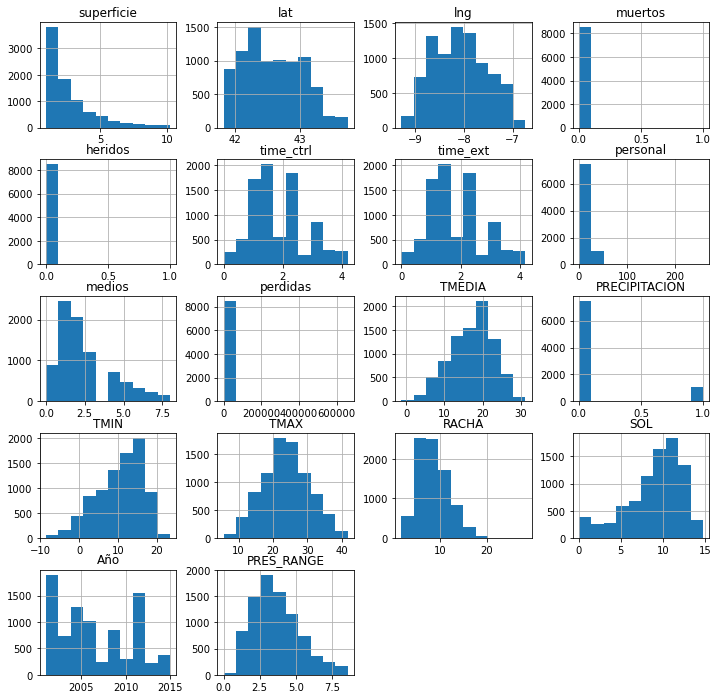

In [8]:
datos_galicia.hist(figsize = (12, 12));


In [9]:
datos_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'perdidas', 'ALTITUD', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE'],
      dtype='object')

Vamos a ver si los tipos de datos han migrado bien desde R

In [10]:
datos_galicia.dtypes

superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
perdidas           int64
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

Vamos a cambiar el tipo de dato de fecha

In [11]:
datos_galicia.dtypes

superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
perdidas           int64
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object

En primer lugar, creamos nuestras variables objetivo: las pérdidas como variable numérica y causas como variable categórica.

### Empezamos con la numérica -> Pérdidas

In [12]:
datos_galicia_num = datos_galicia

In [13]:
datos_galicia_num['target']=datos_galicia_num['perdidas']

Eliminamos la variable fijada como target del dataset original

In [14]:
datos_galicia_num = datos_galicia_num.drop(columns=['perdidas'])

In [15]:
datos_galicia.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'idprovincia', 'idmunicipio',
       'causa', 'muertos', 'heridos', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'perdidas', 'ALTITUD', 'TMEDIA', 'PRECIPITACION',
       'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Trimestre', 'Mes', 'Año',
       'DIR_VIENTO', 'PRES_RANGE', 'target'],
      dtype='object')

Comprobamos que no haya NAs

In [16]:
datos_galicia_num.isnull().sum()

superficie       0
fecha            0
lat              0
lng              0
idprovincia      0
idmunicipio      0
causa            0
muertos          0
heridos          0
time_ctrl        0
time_ext         0
personal         0
medios           0
gastos           0
ALTITUD          0
TMEDIA           0
PRECIPITACION    0
TMIN             0
TMAX             0
VELMEDIA         0
RACHA            0
SOL              0
Trimestre        0
Mes              0
Año              0
DIR_VIENTO       0
PRES_RANGE       0
target           0
dtype: int64

In [17]:
datos_galicia_num.shape

(8504, 28)

Finalmente, tenemos un dataset de 8504 filas y 28 columnas

Ahora, vamos a separar las variables categóricas de las numéricas

In [18]:
lista_numericas=datos_galicia_num._get_numeric_data()
lista_categoricas=datos_galicia_num.select_dtypes(include = ["object"])

Comprobamos

In [19]:
len(lista_categoricas.columns)

10

In [20]:
len(lista_numericas.columns)

18

ha incluido correctamente todas las columnas. Vemos que incluye cada lista

In [21]:
lista_categoricas.columns

Index(['fecha', 'idprovincia', 'idmunicipio', 'causa', 'gastos', 'ALTITUD',
       'VELMEDIA', 'Trimestre', 'Mes', 'DIR_VIENTO'],
      dtype='object')

In [22]:
lista_numericas.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'target'],
      dtype='object')

Vamos a ver como se distribuyen los valores en las variables categoricas

In [23]:
for i in lista_categoricas:
    print(datos_galicia_num[i].value_counts())

2002-09-02    42
2001-09-18    42
2006-08-09    37
2006-08-06    33
2002-08-31    33
              ..
2001-05-25     1
2009-08-12     1
2014-09-07     1
2015-12-24     1
2010-12-26     1
Name: fecha, Length: 1970, dtype: int64
Ourense       2983
A Coruña      2415
Pontevedra    2029
Lugo          1077
Name: idprovincia, dtype: int64
VIANA DO BOLO           216
SANTA COMBA             170
MANZANEDA               164
RODEIRO                 147
MUIÃâOS              128
                       ... 
CARIÃâO                1
BARREIROS                 1
CORCUBIÃâN             1
RIBEIRA DE PIQUÃÂN      1
LOURENZÃÂ               1
Name: idmunicipio, Length: 268, dtype: int64
intencionado         7158
causa desconocida     667
negligencia           441
fuego reproducido     157
rayo                   81
Name: causa, dtype: int64
NO INFO     6331
1K-10K      1436
< 1K         541
10K-100K     192
> 100K         4
Name: gastos, dtype: int64
Superior a 125    2983
Inferior a 80     241

Eliminamos idmunicipio porque son demasiadas categorias

In [24]:
datos_galicia_num = datos_galicia_num.drop(columns=['idmunicipio'])

## Transformamos las variables categóricas -> codificación one-hot

Este método consiste en crear una nueva variable binaria por cada categoria existente en la variable inicial, donde 
1 serán las observaciones que pertenezcan a esa categoría y 0 las demás.

En muchas tareas, tales como la regresión lineal, es común usar k-1 variables binarias en lugar de k, donde k es el número total de categorías. Esto se debe a que estamos añadiendo una variable extra redundante que no es más que una combinación lineal de las otras y seguramente afectará de manera negativa al rendimiento del modelo. Además, al eliminar una variable no estamos perdiendo información, ya que se entiende que, si el resto de las categorías contienen un 0, la categoría correspondiente es la de la variable eliminada.

In [25]:
dummies= pd.get_dummies(datos_galicia_num['idprovincia'], drop_first = True)
dummies.head()

,Lugo,Ourense,Pontevedra
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [26]:
datos_galicia = pd.concat([datos_galicia_num, dummies], axis = 1)

Lo hacemos con el resto de variables categoricas

In [27]:
dummies2= pd.get_dummies(datos_galicia_num['gastos'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies2], axis = 1)
dummies3= pd.get_dummies(datos_galicia_num['ALTITUD'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies3], axis = 1)
dummies4= pd.get_dummies(datos_galicia_num['Trimestre'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies4], axis = 1)
dummies5= pd.get_dummies(datos_galicia_num['DIR_VIENTO'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies5], axis = 1)
dummies6= pd.get_dummies(datos_galicia_num['VELMEDIA'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies6], axis = 1)
dummies7= pd.get_dummies(datos_galicia_num['Mes'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies7], axis = 1)
dummies8= pd.get_dummies(datos_galicia_num['causa'], drop_first = True)
datos_galicia = pd.concat([datos_galicia_num, dummies8], axis = 1)


Ahora eliminamos las variables originales

In [28]:
datos_galicia_num = datos_galicia_num.drop(columns=['idprovincia'])
datos_galicia_num = datos_galicia_num.drop(columns=['gastos'])
datos_galicia_num = datos_galicia_num.drop(columns=['ALTITUD'])
datos_galicia_num = datos_galicia_num.drop(columns=['Trimestre'])
datos_galicia_num = datos_galicia_num.drop(columns=['DIR_VIENTO'])
datos_galicia_num = datos_galicia_num.drop(columns=['VELMEDIA'])
datos_galicia_num = datos_galicia_num.drop(columns=['Mes'])
datos_galicia_num = datos_galicia_num.drop(columns=['causa'])

In [29]:
datos_galicia_num.columns

Index(['superficie', 'fecha', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'target'],
      dtype='object')

In [30]:
len(datos_galicia_num.columns)

19

Vamos a escalar los datos

# Modelado

Dividimos los datos en Train y Test y separamos ambas entre x -> entradas ( variables explicativas) e y-> salidas ( variable objetivo)
Nuestro conjunto de Train es el entrenamiento, en Test probaremos los resultados de nuestras predicciones.


In [ ]:
datos_galicia_num['fecha'] = pd.to_datetime(datos_galicia_num['fecha'])

In [31]:
datos_galicia_num =  datos_galicia_num.drop('fecha', axis = 'columns')

In [32]:
datos_galicia_num.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE', 'target'],
      dtype='object')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia_num.drop('target', axis = 'columns'),
                                        datos_galicia_num['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

Comprobamos las dimensiones de Train y Test

In [34]:
X_train.shape

(6803, 17)

In [35]:
y_train.shape

(6803,)

In [36]:
X_test.shape

(1701, 17)

In [37]:
y_test.shape

(1701,)

Normalizamos

In [38]:
import tensorflow as tf
from tensorflow import keras

In [41]:
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)

In [42]:
norm= tf.keras.layers.experimental.preprocessing.Normalization(axis = -1,dtype=None,mean = None,variance=None)

norm.adapt(X_train)
x_train_norm = norm(X_train)

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Primero vamos a generar varios tipos de modelos con todas las variables para ver cuál puede ser el modelo que más se ajuste a nuestros datos

#### Regresión lineal múltiple

Los algoritmos son utilizados para aprender a predecir el valor de una variable continua a partir de una o más variables explicativas.

In [ ]:
from sklearn import linear_model

In [ ]:
X_train.shape

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
print('Coefficients: \n', model.coef_)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

### Arbol de decisión

En el caso de regresión, en lugar de usar Gini como medida de impureza, usamos MSE, el error cuadrático medio. Para este problema,
si usamos un árbol de decisión de profundidad 2, obtenemos el siguiente árbol.

In [ ]:
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)

In [ ]:
score = modelo_arbol.score(X_train, y_train)
print("R-squared:", score)

In [ ]:
modelo_arbol.score(X_train,y_train)

In [ ]:
modelo_arbol.score(X_test,y_test)

In [ ]:
y_pred        = modelo_arbol.predict(X_test)

Representamos nuestro error

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicción")
plt.title("Pérdidas test y predicción de los datos")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
modelo_randfor = RandomForestRegressor().fit(X_train, y_train)
y_pred        = modelo_randfor.predict(X_test)

In [ ]:
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
modelo_randfor.score(X_train,y_train)

### Naive Bayes

Obtiene la probabilidad considerando las variables predictoras independientes, como si actuasen cada una de manera individual frente a la variable objetivo

In [ ]:
modelo_bayes = naive_bayes.GaussianNB().fit(X_train, y_train)
y_pred        = modelo_bayes.predict(X_test)

In [ ]:
print(modelo_bayes.score(X_train, y_train))

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_Gboost = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
model_Gboost.score(X_train, y_train)

model.score(X_test, y_test)

### Continuamos con la categórica -> Causa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import pickle

Creamos un dataset igual que el incial

In [ ]:
datos_galicia_cat = datos_galicia

In [ ]:
datos_galicia_cat.dtypes

In [ ]:
datos_galicia_cat.shape

In [ ]:
datos_galicia_cat['target']=datos_galicia_cat['causa']

In [ ]:
datos_galicia_cat = datos_galicia_cat.drop(columns=['causa'])

Vemos como se distrubuye la variabe categórica

In [ ]:
print(datos_galicia_cat.groupby('target').size())

Separamos categóricas de numéricas

In [ ]:
lista_numericas=datos_galicia_cat._get_numeric_data()
lista_categoricas=datos_galicia_cat.select_dtypes(include = ["object"])

In [ ]:
lista_numericas.columns

In [ ]:
lista_categoricas.columns

Eliminamos idmunicipio por exceso de categorias

## Transformamos las variables categóricas -> numeración

Primero vemos las categorías que componen a cada una de ellas

In [ ]:
for i in lista_categoricas:
    print(datos_galicia_cat[i].value_counts())

In [ ]:
datos_galicia_cat = datos_galicia_cat.drop(columns=['fecha'])

In [ ]:
datos_galicia_cat['gastos'].value_counts

In [ ]:
datos_galicia_cat.idprovincia.replace(('A Coruña','Lugo','Ourense','Pontevedra'),
                      (1,2,3,4),inplace=True)

datos_galicia_cat.DIR_VIENTO.replace(("N","NE","E","SE","S","SW","W","NW","N"),
                      (1,2,3,4,5,6,7,8,9),inplace=True)

datos_galicia_cat.gastos.replace(("NO INFO","< 1K","1K-10K","10K-100K","> 100K"),
                      (1,2,3,4,5),inplace=True)

datos_galicia_cat.ALTITUD.replace(("NO INFO","Inferior a 80","Entre 100-125","Superior a 125"),
                      (1,2,3,4),inplace=True)

datos_galicia_cat.VELMEDIA.replace(("< 2 m/s","2-4 m/s","4-6 m/s","6-8 m/","> 8 m/s"),
                      (1,2,3,4,5),inplace=True)

datos_galicia_cat.Trimestre.replace(("Q1","Q2","Q3","Q4"),
                      (1,2,3,4),inplace=True)

datos_galicia_cat.Mes.replace(('enero','febrero','marzo','abril','mayo','junio','julio',
                               'agosto','septiembre','octubre','noviembre','diciembre'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

In [ ]:
datos_galicia_cat.dtypes

In [ ]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [ ]:
#datos_galicia_cat = datos_galicia_cat.drop(columns=['gastos'])

In [ ]:
#datos_galicia_cat = datos_galicia_cat.drop(columns=['VELMEDIA'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia_cat.drop('target', axis = 'columns'),
                                        datos_galicia_cat['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1


In [ ]:
!pip3 install "scikit_learn==0.22.2.post1"

In [ ]:
import sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
y = datos_galicia_cat['target']
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)

from scipy import sparse
y_sparse = sparse.csr_matrix(y_dense)


In [ ]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X, y = datos_galicia_cat(return_X_y=True)
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

In [ ]:
classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred     = classifier.predict(X_test)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [ ]:
forest = RandomForestClassifier(random_state=1)
>>> multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
>>> multi_target_forest.fit(X, Y).predict(X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [ ]:
cm

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

In [ ]:
cm